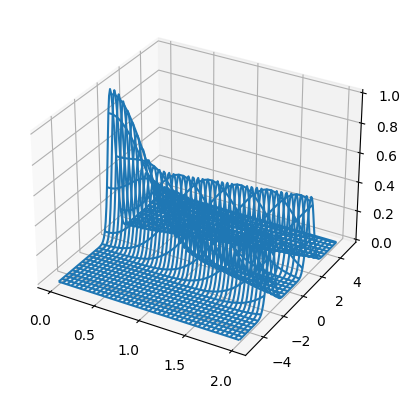

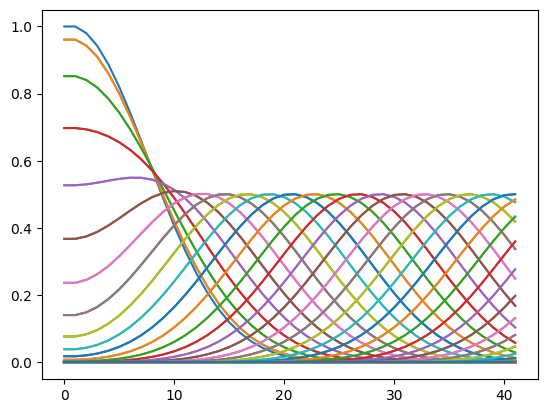

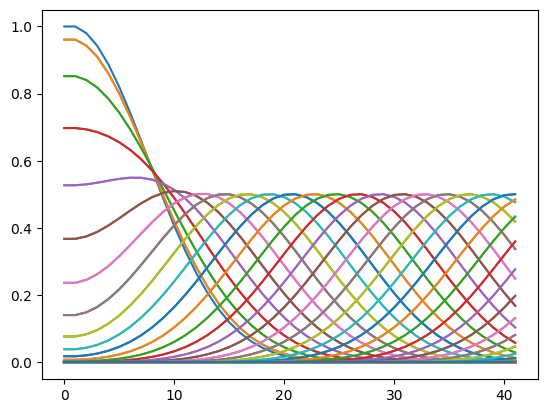

In [5]:
import numpy as np
import matplotlib.pyplot as plt

dx=0.1 #space increment
dt=0.05 #time increment
tmin=0.0 #initial time
tmax=2.0 #simulate until
xmin=-5.0 #left bound
xmax=5.0 #right bound...assume packet never reaches boundary
c=1.0 #speed of sound
rsq=(c*dt/dx)**2 #appears in finite diff sol

nx = int((xmax-xmin)/dx) + 1 #number of points on x grid
nt = int((tmax-tmin)/dt) + 2 #number of points on t grid
u = np.zeros((nt,nx)) #solution to WE

#pulso inicial
def init_fn(x):
    val = np.exp(-(x**2)/0.25)
    if val<.001:
        return 0.0
    else:
        return val

for a in range(0,nx):
    u[0,a]=init_fn(xmin+a*dx)
    u[1,a]=u[0,a]#la derivada u_t(0, x)=0

#simulate dynamics
for t in range(1,nt-1):
    for a in range(1,nx-1):
        u[t+1,a] = 2*(1-rsq)*u[t,a]-u[t-1,a]+rsq*(u[t,a-1]+u[t,a+1])

t=np.linspace(0, 2, nt)
x=np.linspace(-5, 5, nx)

X, T = np.meshgrid(x, t)

ax = plt.axes(projection ='3d')
ax.plot_wireframe(T, X, u)

plt.show()

plt.plot(u)
plt.show(0, 2, )

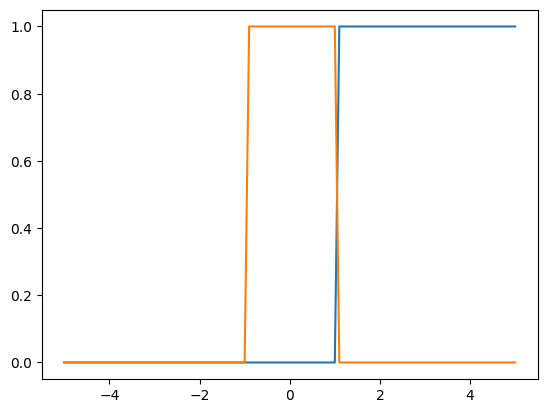

In [14]:
plt.plot(x, np.heaviside(x-1, 0))
plt.plot(x, np.heaviside(x+1, 0)-np.heaviside(x-1, 0))